In [1]:
# Load libraries
import numpy as np
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import datetime

In [2]:
#Load the dataset
dataset = pandas.read_csv('wine_dataset.csv')

In [3]:
#Exploring the dataset
dataset.shape

(6497, 13)

In [4]:
#Exploring the columns
dataset.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

In [5]:
#Exploring the type of data
dataset.dtypes.sort_values(ascending=False)

style                    object
alcohol                 float64
sulphates               float64
pH                      float64
density                 float64
total_sulfur_dioxide    float64
free_sulfur_dioxide     float64
chlorides               float64
residual_sugar          float64
citric_acid             float64
volatile_acidity        float64
fixed_acidity           float64
quality                   int64
dtype: object

In [6]:
#Checking for null values if any
dataset.isnull().sum().sort_values(ascending=False)

style                   0
quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total_sulfur_dioxide    0
free_sulfur_dioxide     0
chlorides               0
residual_sugar          0
citric_acid             0
volatile_acidity        0
fixed_acidity           0
dtype: int64

In [7]:
#Lets explore some samples of actual data
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
#Lets check the no.of not null columns and data types in a single view
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
style                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [9]:
#Lets check the data distribution.This shows wine features are distributed more around wine quality = 5 than other values.
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
dataset['style'].value_counts()

white    4898
red      1599
Name: style, dtype: int64

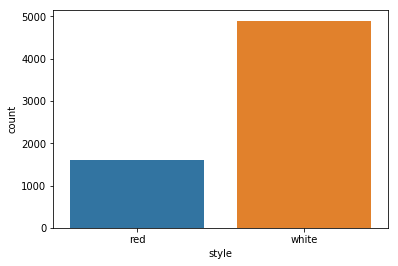

In [11]:
sns.countplot(x="style", data=dataset)
plt.show()

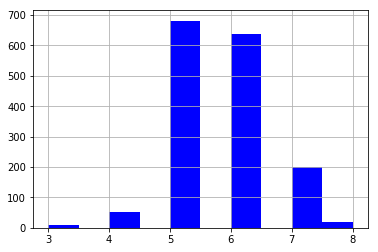

In [12]:
dataset_var = dataset [ dataset['style'] == 'red']
#dataset_var['quality'].hist()
dataset_var['quality'].hist(color='blue')

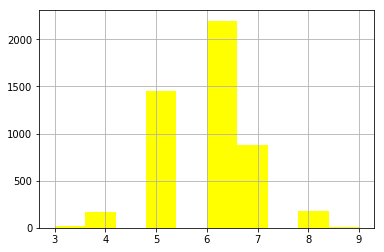

In [13]:
dataset_var = dataset [ dataset['style'] == 'white']
#dataset_var['quality'].hist()
dataset_var['quality'].hist(color='yellow')

In [14]:
#Exploring ordinal features 
dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [15]:
#Lets analyse the correlation between different features and the target ariable
dataset_tmp = dataset
style_mapping = {'red': 1,'white': 2}
dataset_tmp['style'] = dataset['style'].map(style_mapping)
corr = dataset_tmp.corr()
corr.shape
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


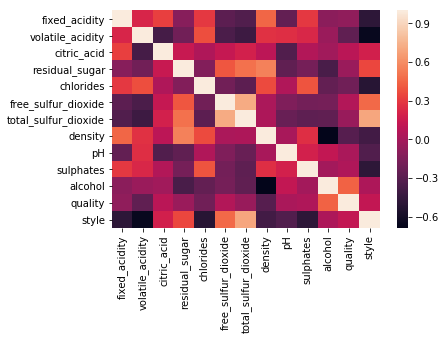

In [16]:
#Visualising the relationship and the intensity between different features and target variable
sns.heatmap(corr)

In [17]:
# Lets check which is the dominat feature thats higly correlated with the target variable
corr = corr.abs()
print (corr['style'].sort_values(ascending=False))

style                   1.000000
total_sulfur_dioxide    0.700357
volatile_acidity        0.653036
chlorides               0.512678
sulphates               0.487218
fixed_acidity           0.486740
free_sulfur_dioxide     0.471644
density                 0.390645
residual_sugar          0.348821
pH                      0.329129
citric_acid             0.187397
quality                 0.119323
alcohol                 0.032970
Name: style, dtype: float64


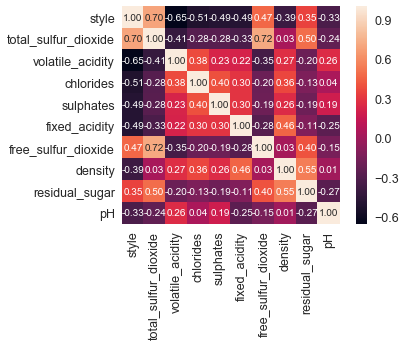

In [18]:
#style correlation matrix

k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'style')['style'].index
cm = np.corrcoef(dataset_tmp[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'\nConclusion : As the overall amount of a total_sulfur_dioxide increases, its makes a tansition from red to white wine\n1 to 2 in our case\n1 --> red\n2 --> white\n\n'

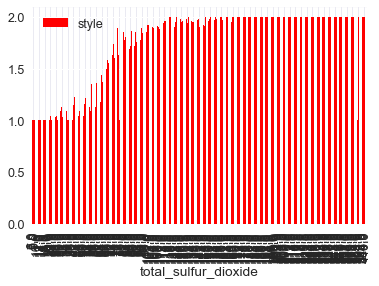

In [19]:
#let's check the mean total_sulfur_dioxide per style and plot it.

pivot = dataset_tmp.pivot_table(index='total_sulfur_dioxide', values='style', aggfunc=np.mean)

#visualize this pivot table more easily, we can create a bar plot

pivot.plot(kind='bar', color='red')

'''
Conclusion : As the overall amount of a total_sulfur_dioxide increases, its makes a tansition from red to white wine
1 to 2 in our case
1 --> red
2 --> white

'''

'\nConclusion : As the overall amount of a volatile_acidity increases, its makes a tansition from white to red wine\n2 to 1 in our case\n1 --> red\n2 --> white\n\n\n'

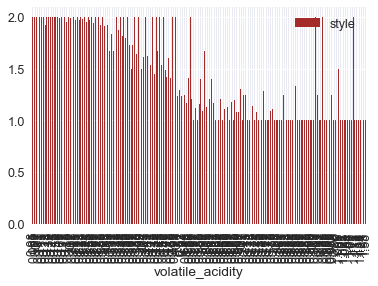

In [20]:
#let's check the mean volatile_acidity per style and plot it.

pivot = dataset_tmp.pivot_table(index='volatile_acidity', values='style', aggfunc=np.mean)

#visualize this pivot table more easily, we can create a bar plot

pivot.plot(kind='bar', color='brown')

'''
Conclusion : As the overall amount of a volatile_acidity increases, its makes a tansition from white to red wine
2 to 1 in our case
1 --> red
2 --> white


'''

'\nConclusion : As the overall amount of a chlorides increases, the wine is more white and gradually as amount chlorides\nincreases the whitish part slowly vanishes and remains constant for some permishable amount of chlorides.On further \ndecreasing the chlorides we see a sudden change or spikes in the nature of wine from white to reddish.\n2 to 1 in our case\n1 --> red\n2 --> white\n\n\n'

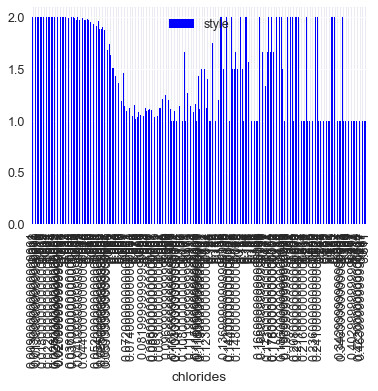

In [21]:
#let's check the mean chlorides per style and plot it.

pivot = dataset_tmp.pivot_table(index='chlorides', values='style', aggfunc=np.mean)

#visualize this pivot table more easily, we can create a bar plot

pivot.plot(kind='bar', color='blue')

'''
Conclusion : As the overall amount of a chlorides increases, the wine is more white and gradually as amount chlorides
increases the whitish part slowly vanishes and remains constant for some permishable amount of chlorides.On further 
decreasing the chlorides we see a sudden change or spikes in the nature of wine from white to reddish.
2 to 1 in our case
1 --> red
2 --> white


'''

'\nConclusion : As the overall amount of a sulphates increases, the wine is white .The wine goes reddish if we start decreasing\nfurther the amount of sulphates.\n2 to 1 in our case\n1 --> red\n2 --> white\n\n\n'

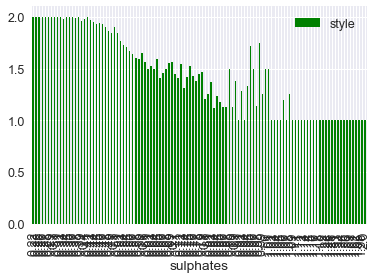

In [22]:
#let's check the mean sulphates per style and plot it.

pivot = dataset_tmp.pivot_table(index='sulphates', values='style', aggfunc=np.mean)

#visualize this pivot table more easily, we can create a bar plot

pivot.plot(kind='bar', color='green')

'''
Conclusion : As the overall amount of a sulphates increases, the wine is white .The wine goes reddish if we start decreasing
further the amount of sulphates.
2 to 1 in our case
1 --> red
2 --> white


'''

'\nConclusion : As the overall amount of a fixed_acidity increases, the wine is white .The wine goes reddish if we start decreasing\nfurther the amount of fixed_acidity.\n2 to 1 in our case\n1 --> red\n2 --> white\n\n\n'

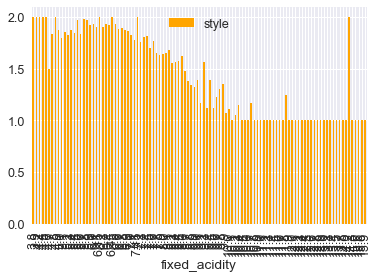

In [23]:
#let's check the mean fixed_acidity per style and plot it.

pivot = dataset_tmp.pivot_table(index='fixed_acidity', values='style', aggfunc=np.mean)

#visualize this pivot table more easily, we can create a bar plot

pivot.plot(kind='bar', color='orange')

'''
Conclusion : As the overall amount of a fixed_acidity increases, the wine is white .The wine goes reddish if we start decreasing
further the amount of fixed_acidity.
2 to 1 in our case
1 --> red
2 --> white


'''

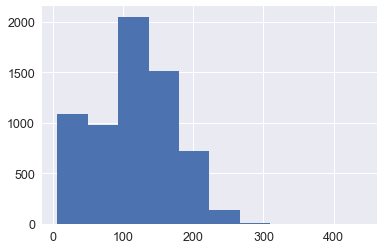

In [24]:
#lets plt the nature of these higly correlated features and thier probability funtion 
dataset['total_sulfur_dioxide'].hist()

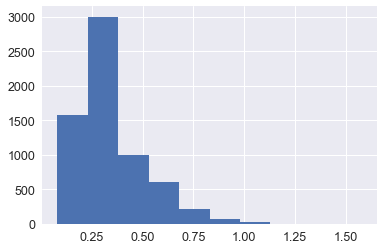

In [25]:
dataset['volatile_acidity'].hist()

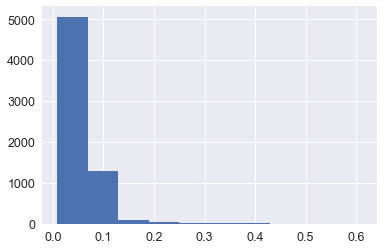

In [26]:
dataset['chlorides'].hist()

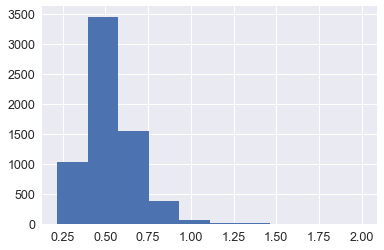

In [27]:
dataset['sulphates'].hist()

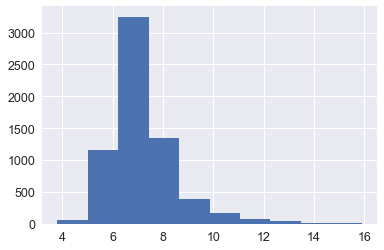

In [28]:
dataset['fixed_acidity'].hist()

In [29]:
# Now having this knowledge of the dependant features we are ready to build the algorithm and propse a model
# which can suggest a wine is white or red by analysing the feature vectors

# Split-out validation dataset
array = dataset.values
X = array[:,0:12]
Y = array[:,12]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [30]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#Since we aren't sure which algorithm can best fit the dataset we will try to see which algorithm can best perform

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [31]:
# evaluate each model in turn using a K-fold cross validation technique(k=10)
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
	print(msg)
    
# As we can see LDA has taken a lead and performing well in the cross validation step meaning our model will be 
# less biased with a high accuracy and low standard deviation

LR: 98.037239 (0.003928)
LDA: 99.461168 (0.001887)
KNN: 93.765859 (0.011977)
CART: 98.460649 (0.004552)
NB: 96.863495 (0.009509)
SVM: 94.131762 (0.011716)


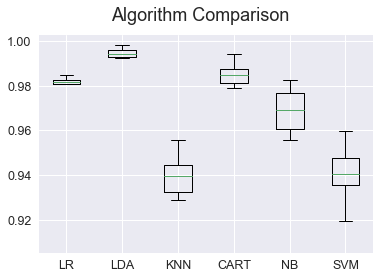

In [32]:
#Now let compare the algorithms we trained and see how they performed 
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# Now we have got our best model .So lets train and make predictions

# Make predictions on validation dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print('Accuracy ---->', accuracy_score(Y_validation, predictions)*100,'\n')
print('Confusion Matrix ---->\n',confusion_matrix(Y_validation, predictions),'\n')
print('Classification Report ----> \n\n',classification_report(Y_validation, predictions))


Accuracy ----> 99.6923076923077 

Confusion Matrix ---->
 [[317   2]
 [  2 979]] 

Classification Report ----> 

              precision    recall  f1-score   support

        1.0       0.99      0.99      0.99       319
        2.0       1.00      1.00      1.00       981

avg / total       1.00      1.00      1.00      1300



In [34]:
#Lets make some prediction on a test dataset 
test_data=[[7.6,0.78,0,1.9,0.076,11.1,34,0.9978,3.51,0.56,9.4,5]]
test_data_reshaped=np.reshape(test_data, (-1, 12))
prediction_test_date = LDA.predict(test_data_reshaped)
if (prediction_test_date == 1):
    print('Its Red Wine')
else:
    print('Its White Wine')

Its Red Wine
